In [1]:
from Clases.Codigo import *

In [2]:
def GeSeA():
    ats=[Atomo((0.75,0.577516675),posZ=0.189562783,color='blue',sig='Ge'),
         Atomo((0.25,0.077767663),posZ=0.073721662,color='blue',sig='Ge'),
         Atomo((0.25,0.050640754),posZ=0.195155814,color='green',sig='Se'),
         Atomo((0.75,0.550593972),posZ=0.068081208,color='green',sig='Se')]
    a = (4.0130319595,0.0000000000)
    b = (0.0000000000,4.0482119840)
    gese = Malla(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 21.1464214325
    return gese

def GeSeB():
    ats=[Atomo((0.75,0.367782116),posZ=0.160547823,color='darkred',sig='Ge'),
         Atomo((0.25,0.868400931),posZ=0.063394181,color='darkred',sig='Ge'),
         Atomo((0.75,0.846623361),posZ=0.160837263,color='black',sig='Se'),
         Atomo((0.25,0.346943438),posZ=0.063084550,color='black',sig='Se')]
    a = (3.8261001110,0.0000000000)
    b = (0.0000000000,5.8088998795)
    gese = Malla(a,b,atms=ats,name='GeSe-Alfa')
    gese.detachment = 18.0892009735
    return gese


In [3]:
gcA=GeSeA()
gcB=GeSeB()
gcr=gcB.mRot(90)

In [4]:
Aa, Ab = gcA.u, gcA.v
Ba, Bb = gcB.u, gcB.v
ra, rb = gcr.u, gcr.v

In [5]:
def busca(Vs1,Vs2, th, rango=20, limDelta=0.5, show=False):
    (vectU,vectV) = Vs1
    (a2,b2) = Vs2
    lim = limDelta
    f1, f2 = 0, 0
    res = [[],[]]
    rmin = [0,0,0,0,0.0]
    rmin2 = [0,0,0,0,0.0]
    ang = math.radians(th)
    cos = math.cos(ang)
    sen = math.sin(ang)
    ru, rv = rota(a2,th), rota(b2,th)
    (u1,u2) = vectU
    (v1,v2) = vectV
    ax1 = (u2*v1)-(u1*v2)
    ax2 = (u1*v1)+(u2*v2)
    ax3 = (v1**2)+(v2**2)
    ax4 = (u1**2)+(u2**2)
    delta=0.0
    mind1=100
    mind2=100
    for k in range(1,(2*rango)+1):
        for i in range(k+1):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en b+
                a,b = i,-j
                c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                r1 = sumaV(multV(a,vectU),multV(b,vectV))
                r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)*(abs(delta))
                if show:
                    print("-({},{}),({},{}):Err={}".format(a,b,round(c),round(d),err))
                if err<mind1:
                    mind1=err
                if (err<limDelta):
                    #print(1-delta)
                    if(abs(1-delta)<0.1):
                        res[0].append([[a,b],[round(c),round(d)],delta])
                        print(">{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en b-
                if j!=0:
                    a,b = i,j
                    c = (a*(ax1*cos-ax2*sen)/ax1)-(b*(ax3*sen)/ax1)
                    d = (b*(ax1*cos+ax2*sen)/ax1)+(a*(ax4*sen)/ax1)
                    r1 = sumaV(multV(a,vectU),multV(b,vectV))
                    r2 = sumaV(multV(round(c),ru),multV(round(d),rv))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)*(abs(delta))
                    if show:
                        print("-({},{}),({},{}):Err={}".format(a,b,round(c),round(d),err))
                    if err<mind2:
                        mind2=err
                    if (err<limDelta):
                        if(abs(1-delta)<0.1):
                            res[1].append([[a,b],[round(c),round(d)],delta])
                            print(">>{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
    if (mind1+mind2)/2<0.5:
        #print("******")
        print("----------\n{}°:{}\n\tdelta1={}\n\tdelta2={}\n----------".format(th,(mind1+mind2)/2,mind1,mind2))
    return res, ((mind1+mind2)/2)

def dameP(r,theta):
    tmin=200
    angR=0.0
    resultado=""
    P=(1,0,0,1)
    for i in range(len(r[0])):
        for j in range(len(r[1])):
            [m,p] = r[0][i][0]
            [n,q] = r[1][j][0]
            tam = (m*q)-(n*p)
            if tam>0:
                print((m,p),(n,q),"det=",tam)
                if tam<tmin:
                    resultado="\nMejor P para Theta={}:\n|{}\t{}|\n|{}\t{}|\nDet={}".format(theta,m,n,p,q,tam)
                    P = (m,n,p,q)
                    tmin=tam
    print(resultado)
    return P

In [6]:
def rastrea(Vs1,Vs2, ran=15, delta=0.1):
    res = []
    datos = []
    for i in range(36000):
        th = i/100
        resi, erP = busca(Vs1,Vs2, th, rango=ran, limDelta=delta)
        if erP<=1:
            datos.append([th,erP])
        if resi[0] != []:
            if resi[1] != []:
                res.append([th,resi]) 
    return res, np.array(datos)

In [ ]:
r, graf = rastrea((Aa,Ab),(Ba,Bb),delta=0.1)

In [ ]:
xs, ys = graf[:,0], graf[:,1]

In [ ]:
xsr = (xs*math.pi)/180
plt.plot(xs, ys)
plt.show()

In [ ]:
analisis=np.r_[True, ys[1:] < ys[:-1]] & np.r_[ys[:-1:] < ys[1:], True]
for i in range(len(analisis)):
    if analisis[i]==True:
        print(xs[i],":",ys[i])

In [ ]:
res,minD=busca((Aa,Ab),(Ba,Bb), -90, rango=50, limDelta=0.4)

In [ ]:
P=dameP(res,90)
P

In [ ]:
su,sv=transfVs(Aa,Ab,(1,2,-1,2))
cAng(su,sv)

In [ ]:
sm0 = superMesh(multV(20,Aa),multV(20,Ab),[gcA])
sm0.showNM(1,1,name='GeCeAlfa(90)original.png')

In [ ]:
sm1 = superMesh(su,sv,[gcA,gcr])
sm1.showNM(5,5,name='GeCeAlfa-Beta(44.86).png')
sm1.exporta(name='GeCe-Alfa-Beta(44.86)')

In [ ]:
gcr=gcB.mRot(90)
gcr.showNM(1,1)
gcA.showNM(1,1)


In [ ]:
cAng(su,sv)

In [ ]:
sm1.exporta(name='GeCe alfa-beta(44.86°)')

In [ ]:
angR = 54
vec1 = (2.44,0)
vec2 = rota(vec1,angR*2)

In [ ]:
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((0,0),posZ=0.1,color='blue',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Capa1({}º) rot:0º'.format(angR*2))
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='black',sig='C2')]
cosa2 = Malla(rota(vec1,angR),rota(vec2,angR),atms=ats,name='Capa1({}º) rot:{}º'.format(angR*2,angR))
showme(cosa2,5,5)

In [ ]:
superMesh((60,0),(0,60),[cosa,cosa2]).showNM(1,1)

In [ ]:
multV(10,vec1),multV(10,vec2)
(u1,u2), (v1,v2) = cosa2.u, cosa2.v
(p1,p2), (q1,q2) = multV(10,vec1),multV(10,vec2)
np1 = ((p2*v1)-(p1*v2))/((u2*v1)-(u1*v2))
np1

In [ ]:
sCosa = superMesh(multV(10,vec1),multV(10,vec2),[cosa,cosa2])
sCosa.showNM(1,1)

In [ ]:
#res,minD=busca((vec1,vec2),(vec1,vec2), 54, rango=7, limDelta=5)
res,minD=calculaPares((vec1,vec2),(vec1,vec2), 54, maxIt=10, eps=2)

In [ ]:
P=dameP(res,54)

In [ ]:
su,sv=transfVs(vec1,vec2,(4,4,-4,6))
cAng(su,sv)

In [ ]:
sv1 = m2V(vec1,vec2,(4,-4))
sv2 = m2V(vec1,vec2,(4,6))#rota(sv1,108) #m2V(vec1,vec2,(-4,6))
print(sv1,sv2)
(dist(sv1,(0,0)),dist(sv2,(0,0)))

In [ ]:
u,v=vec1,vec2
ru,rv = rota(vec1,54), rota(vec2,54)
print("Vectores en Capa 1:\n\t",m2V(u,v,(4,-4)))
print("Vectores en Capa 2:\n\t",m2V(ru,rv,(-2,-7)))
print("Diferencia en resultados:\n\t",dist(m2V(u,v,(4,-4)),m2V(ru,rv,(-2,-7))))
#dist(m2V(u,v,(1,-1)),m2V(ru,rv,(1,1)))

In [ ]:
#Calculamos el alfa
(x,y) = sv1
alfaX, alfaY = sv2
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))
cAng((x,y), (alfaX, alfaY))

In [ ]:
#Redimencionamos los vectores generadores de ambas capas con los que obtuvimos. 
cosa.u, cosa.v = transfVs((x,y), (alfaX, alfaY),(3/20,-1/10,1/10,1/10))
cosa2.u, cosa2.v = transfVs((x,y), (alfaX, alfaY),(1/19,-3/19,7/38,-1/19))
#Actualizando valores
ru,rv=cosa2.u,cosa2.v
u,v=cosa.u,cosa.v
(a1,a2),(b1,b2) = cosa.u,cosa.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = cosa2.u,cosa2.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

In [ ]:
(vec1,vec2)

In [ ]:
su,sv=transfVs(u,v,(4,4,-4,6))
sCosa = superMesh(su,sv,[cosa,cosa2])
sCosa.showNM(5,5)
print(superMesh(cosa.u,cosa.v,[cosa]))
print(superMesh(cosa2.u,cosa2.v,[cosa2]))
#cosa2.showNM(5,5)
#sCosa.exporta(name='Bicapa H3,H6(108º deformado)')
#superMesh(cosa.u,cosa.v,[cosa]).exporta(name='Capa1 H3({}º deformada)'.format(angR*2))
#superMesh(cosa2.u,cosa2.v,[cosa2]).exporta(name='Capa2 H6({}º  deformada)'.format(angR*2))

In [ ]:
dist(cosa2.u,(0,0))/2.44

In [ ]:
dist(m2V(vec1,vec2,(4,-4)),(0,0))

In [ ]:
sep = 30
vec1 = (2.44,0.0)
vec2 = rota(vec1,sep*4)
'''
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='blue',sig='C2'),
     Atomo((1/3,1/3),posZ=0.1,color='darkred',sig='C1'),
     Atomo((2/3,2/3),posZ=0.1,color='darkred',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Cosa')
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='black',sig='C2'),
     Atomo((1/3,1/3),posZ=0.1,color='grey',sig='C1'),
     Atomo((2/3,2/3),posZ=0.1,color='grey',sig='C2')]
cosa2 = Malla(vec1,vec2,atms=ats,name='Cosa2')

'''
ats=[Atomo((1/3,2/3),posZ=0.1,color='blue',sig='C1'),
     Atomo((2/3,1/3),posZ=0.1,color='pink',sig='C2')]
cosa = Malla(vec1,vec2,atms=ats,name='Cosa')
ats=[Atomo((1/3,2/3),posZ=0.1,color='black',sig='C3'),
     Atomo((2/3,1/3),posZ=0.1,color='red',sig='C4')]
cosa2 = Malla(vec1,vec2,atms=ats,name='Cosa2')
cosa2=cosa2.mRot(-sep)

sCosa = superMesh((100,0),(0,100),[cosa,cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='ParaFondo')

In [ ]:
res,minD=busca((vec1,vec2),(vec1,vec2), -30, rango=16, limDelta=0.1)
print(res[0][1][0],"-> Estres:{}%".format((res[0][1][2]-1)*100))

In [ ]:
cosa2 = Malla(multV(res[0][1][2],vec1),multV(res[0][1][2],vec2),atms=ats,name='Cosa2')
cosa2=cosa2.mRot(-sep)
print(cosa2.u,cosa2.v)

In [ ]:
su,sv=transfVs(vec1,vec2,(11,4,-4,15))
sCosa = superMesh(su,sv,[cosa,cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='30°Grande')

In [ ]:
su,sv=vec1,vec2
sCosa = superMesh(su,sv,[cosa])
sCosa.showNM(1,1)
sCosa.exporta(name='Capa1')

su,sv=cosa2.u, cosa2.v
sCosa = superMesh(su,sv,[cosa2])
sCosa.showNM(1,1)
sCosa.exporta(name='Capa2')

In [ ]:
(ar, br) = rota(Ba,90), rota(Bb,90)
ar, br

In [ ]:
dist(m2V(ar,br,(0,-9)),m2V(Aa,Ab,(13,0)))

In [ ]:
busca((Aa,Ab),(Ba,Bb),90,show=True)

In [ ]:
(u_1,u_2),(v_1,v_2),(p_1,p_2),(q_1,q_2)=Aa,Ab,ar,br
a = 0
b = 2
c = (-a*q_2*u_1+a*q_1*u_2-b*q_2*v_1+b*q_1*v_2)/(p_2*q_1-p_1*q_2)
d = (a*p_2*u_1-a*p_1*u_2+b*p_2*v_1-b*p_1*v_2)/(p_2*q_1-p_1*q_2)

In [ ]:
c,d

In [ ]:
dist(m2V(ar,br,(round(c),round(d))),m2V(Aa,Ab,(a,b)))

In [7]:
def calculaPares(vrs1, vrs2, th, maxIt=15, eps=0.1, show=False):
    (u,v),(p,q) = vrs1, vrs2
    ((u_1,u_2),(v_1,v_2)) = u, v
    (p_1,p_2),(q_1,q_2) = rp, rq = rota(p,th), rota(q,th)
    res = [[],[]]
    rango = maxIt
    delta=0.0
    minE1=100
    minE2=100
    
    for k in range(1,(2*rango)+1):
        for i in range(k+1):
            j = k-i
            if(i<(rango+1) and j<(rango+1)):
                # Buscando en b+
                a,b = i,-j
                c = (-a*q_2*u_1+a*q_1*u_2-b*q_2*v_1+b*q_1*v_2)/(p_2*q_1-p_1*q_2)
                d = (a*p_2*u_1-a*p_1*u_2+b*p_2*v_1-b*p_1*v_2)/(p_2*q_1-p_1*q_2)
                # Vector esperado
                r1 = sumaV(multV(a,u),multV(b,v))
                #Vector aproximado
                r2 = sumaV(multV(round(c),rp),multV(round(d),rq))
                delta = dist((0,0),r1)/dist((0,0),r2)
                err = dist(r1,r2)#*(abs(delta))
                if show:
                    print("-({},{}),({},{}):Err={}".format(a,b,round(c),round(d),err))
                if err<minE1:
                    minE1=err
                if (err<eps):
                    #print(1-delta)
                    if(abs(1-delta)<0.07):
                        res[0].append([[a,b],[round(c),round(d)],delta,err])
                        print(">{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
                # Buscando en b-
                if j!=0:
                    a,b = i,j
                    c = (-a*q_2*u_1+a*q_1*u_2-b*q_2*v_1+b*q_1*v_2)/(p_2*q_1-p_1*q_2)
                    d = (a*p_2*u_1-a*p_1*u_2+b*p_2*v_1-b*p_1*v_2)/(p_2*q_1-p_1*q_2)
                    # Vector esperado
                    r1 = sumaV(multV(a,u),multV(b,v))
                    #Vector aproximado
                    r2 = sumaV(multV(round(c),rp),multV(round(d),rq))
                    delta = dist((0,0),r1)/dist((0,0),r2)
                    err = dist(r1,r2)#*(abs(delta))
                    if show:
                        print("-({},{}),({},{}):Err={}".format(a,b,round(c),round(d),err))
                    if err<minE2:
                        minE2=err
                    if (err<eps):
                        if(abs(1-delta)<0.07):
                            res[1].append([[a,b],[round(c),round(d)],delta,err])
                            print(">>{}°:({},{})-({},{}): Delta={}%".format(th,a,b,round(c),round(d),delta*100),":",dist(r1,r2))
    if (minE1+minE2)/2<0.5:
        #print("******")
        print("----------\n{}°:{}\n\tdelta1={}\n\tdelta2={}\n----------".format(th,(minE1+minE2)/2,minE1,minE2))
    return res, ((minE1+minE2)/2)
                

In [ ]:
calculaPares((Aa,Ab),(Ba,Bb),90,eps=0.5,show=True)

In [ ]:
rango=20
for k in range(1,(2*rango)+1):
    for i in range(k+1):
        j = k-i
        if(i<(rango+1) and j<(rango+1)):
            a,b = i,-j
            print(">",a,b)
            a,b = i,j
            print(">>",a,b)

In [ ]:
ats=[Atomo((1/3,2/3),posZ=0.1,color='sienna',sig='C'),
     Atomo((2/3,1/3),posZ=0.1,color='sienna',sig='C')]
enl = [[(1/3,2/3),(2/3,1/3)],
       [(1/3,2/3),(2/3,4/3)],
       [(1/3,2/3),(-1/3,1/3)]]
Gfn = Malla((2.44,0), rota((2.44,0),120), atms=ats, enls=enl, name='Graphene')
ats=[Atomo((2/3,1/3),posZ=0.268122792,color='darkcyan',sig='W'),
     Atomo((1/3,2/3),posZ=0.100000000,color='darkolivegreen',sig='Se'),
     Atomo((1/3,2/3),posZ=0.436245590,color='darkolivegreen',sig='Se')]
WSe2 = Malla((3.3270692825,0),rota((3.3270692825,0),120),atms=ats, enls=enl,name='WS_2')
#WSe2.showNM(5,5)

In [ ]:
showme(WSe2.mRot(80),10,10,t=25)

In [ ]:
th = 10
G_WS2 = hexa6(1)
G_WS2 = superMesh2((30,0),(0,30),[WSe2,Gfn.mRot(th)])
showme(G_WS2,1,1,t=30)
nombre = "G({}º) sobre WSe_2".format(th)
#G_WS2.exporta(name=nombre)

In [ ]:
(x,y)=rota((3.3270692825,0.0000000000),120)
print("{:.10f}\t{:.10f}".format(x,y))

In [ ]:
def showme(mesh, n, m, n0=0 ,m0=0, t=20,name=''):
    vecU,vecV = mesh.u, mesh.v
    red=[]
    lx1,ly1 = getLim(vecU,vecV,n,m)
    lx2,ly2 = getLim(vecU,vecV,n,m0)
    lx3,ly3 = getLim(vecU,vecV,n0,m)
    lx4,ly4 = getLim(vecU,vecV,n0,m0)
    lmsx = [min(lx1[0],lx2[0],lx3[0],lx4[0]),max(lx1[1],lx2[1],lx3[1],lx4[1])]
    lmsy = [min(ly1[0],ly2[0],ly3[0],ly4[0]),max(ly1[1],ly2[1],ly3[1],ly4[1])]
    difMax = max((lmsx[1]-lmsx[0]),(lmsy[1]-lmsy[0]))
    #mi,ma = (min(lx4[0],ly4[0],mi)-1), (max(lx4[1],ly4[1],ma)+1)
    ats=[]
    col=[]
    enls=[]
    #mesh.enls=[]
    for i in range(abs(n-n0)):
        a=i+n0
        for j in range(abs(m-m0)):
            b=j+m0
            #Carga contornos de celda
            red.append([m2V(vecU,vecV,(a,b)),m2V(vecU,vecV,(a+1,b))])
            red.append([m2V(vecU,vecV,(a,b)),m2V(vecU,vecV,(a,b+1))])
            red.append([m2V(vecU,vecV,(a+1,b)),m2V(vecU,vecV,(a+1,b+1))])
            red.append([m2V(vecU,vecV,(a,b+1)),m2V(vecU,vecV,(a+1,b+1))])
            #Carga los atomos
            for c in mesh.atms:
                for at in c:
                    (pu,pv) = at.pos
                    na = m2V(vecU,vecV,(a+pu,b+pv))
                    ats.append(na)
                    col.append(at.color)
            #Carga los enlaces
            for (ei,ef) in mesh.enls:
                (ei1,ei2) = ei
                (ef1,ef2) = ef
                o = m2V(vecU,vecV,(a+ei1,b+ei2))
                f = m2V(vecU,vecV,(a+ef1,b+ef2))
                enls.append([o,f])
    fig, maxs = plt.subplots()
    lis = np.array(ats)
    xs, ys = lis[:,0], lis[:,1]
    #Dibuja los Atomos
    maxs.scatter(xs,ys, color=col,s=t*5)
    lc = mc.LineCollection(np.array(enls), colors='silver', linewidths=(t/15))
    lr = mc.LineCollection(np.array(red), colors='gray', linewidths=(t/20))
    #Dibuja los Enlaces
    maxs.add_collection(lc)
    #Dibuja los contornos de las celdas
    maxs.add_collection(lr)
    maxs.axes.xaxis.set_visible(False)
    maxs.axes.yaxis.set_visible(False)
    medX = ((lmsx[0]+lmsx[1])/2)
    medY = ((lmsy[0]+lmsy[1])/2)
    maxs.set(xlim=(medX-+(difMax/2),medX+(difMax/2)), ylim = (medY-+(difMax/2),medY+(difMax/2)))
    if name!='':
        name=name+".png"
        plt.savefig(name,dpi=300, bbox_inches='tight')
    plt.show()
    return 1

def isitin2(m,cent, sm, slvl):
    '''Verifica que átomos pertenecientes a una celda de la malla "m" con centro en "cen" que se encuentran en
la celda principal de la malla "sm". Todos los átomos que lo estén se agregan a los átomos de sm.

m -> Malla de la que vamos a copiar su celda unitaria sobre la otra
cen -> Posiciòn del origen de la celda unitaria
sm -> Malla sobre la que copiaremos los elementos de la celda unitaria de m que quedan dentro de esta.
slvl -> Maneja el nivel de capa de sm en que posicionamos m
'''
    
    er = 1/(10**7)
    inUnit = False
    (u1,u2) = m.u
    (v1,v2) = m.v
    (p1,p2) = sm.u
    (q1,q2) = sm.v
    eq0 = (p2*q1)-(p1*q2)
    eq1 = (q1*u2)-(q2*u1)
    eq2 = (q1*v2)-(q2*v1)
    eq3 = (p2*u1)-(p1*u2)
    eq4 = (p2*v1)-(p1*v2)
    for c in m.atms:# Iteramos en cada lista de Atomos de la matriz m
        nc=[]
        for a in c:# Iteramos en cada atomo de la lista
            (x,y) = sumaV(cent,a.pos)
            # Calculamos la posición del átomo con respecto a las coordenadas expresadas en los vectores de sm
            nx = (eq1*x+eq2*y)/eq0 
            ny = (eq3*x+eq4*y)/eq0
            if (nx<(1+er) and nx>(0-er)) and (ny<(1+er) and ny>(0-er)):
                nAtm = Atomo((nx,ny),posZ=a.posZ,color=a.color,sig=a.sig, lvl=(a.lvl+slvl))
                #print("Agregado atomo",nAtm)
                nAtm.clasifica(sm.atms)
    for e in m.enls:
        (x1,y1) = sumaV(cent,e[0])
        (x2,y2) = sumaV(cent,e[1])
        (ox,oy) = ((eq1*x1+eq2*y1)/eq0,(eq3*x1+eq4*y1)/eq0)
        f = ((eq1*x2+eq2*y2)/eq0,(eq3*x2+eq4*y2)/eq0)
        if (ox<1 and ox>0) and (oy<1 and oy>0):
            sm.enls.append([(ox,oy),f])
    return 1

def megeCut2(mo, sm, lvl=0):
    (u1,u2), (v1,v2) = mo.u, mo.v
    (p1,p2), (q1,q2) = sm.u, sm.v
    np1 = ((p2*v1)-(p1*v2))/((u2*v1)-(u1*v2))
    np2 = ((p1*u2)-(p2*u1))/((u2*v1)-(u1*v2))
    nq1 = ((q2*v1)-(q1*v2))/((u2*v1)-(u1*v2))
    nq2 = ((q1*u2)-(q2*u1))/((u2*v1)-(u1*v2))
    npq1 = np1+nq1
    npq2 = np2+nq2
    lu = [round(min(np1,nq1,npq1,0)-1),round(max(np1,nq1,npq1,0)+1)]
    lv = [round(min(np2,nq2,npq2,0)-1),round(max(np2,nq2,npq2,0)+1)]
    for i in range(lu[1]-lu[0]):
        a = i+lu[0]
        for j in range(lv[1]-lv[0]):
            b = j+lv[0]
            isitin2(mo,(a,b),sm,lvl)
    return 1

def superMesh2(su,sv,loMs):
    '''Crea una SuperMalla en bace a una lista de Mallas "loMs" con los vectores su y sv'''
    sM = Malla(su,sv,atms=[],enls=[])
    sM.prof=0
    i=0
    for m in loMs:
        megeCut2(m, sM, lvl=i)
        sM.prof=sM.prof+m.prof
        i = (i+1)*m.prof
    return sM

In [ ]:
len(G_WS2.enls)

In [ ]:
#Gfn.enls=[]
for i in range(36):
    th = 10*i
    mr = Gfn.mRot(th)
    G_WSe2 = superMesh2(multV(20,WSe2.u),rota(multV(20,WSe2.u),90),[WSe2,Gfn.mRot(th)])
    #G_WSe2.enls=[]
    nombre = "bicapa/G({}º) sobre WSe_2".format(th)
    showme(G_WSe2,1,1,name=nombre,t=10)
    #G_WSe2.exporta(name=nombre)

In [ ]:
G_WSe2 = superMesh2(rota(multV(20,WSe2.u),30),rota(multV(20,WSe2.v),30),[Gfn])
showme(G_WSe2,1,1,t=5, name='grafeno')

In [ ]:
P0 = (2.777708844,7.386440292)
P1 = (0.744396016,8.863728703)
P2 = (4.627677254,8.863728703)
V1 = m2V(P0,P1,(-1,1))
V2 = m2V(P0,P2,(-1,1))
(V1,V2)

In [ ]:
P0 = (2.777708844,7.386440292)
P1 = (0.511063909,9.330239998)
P2 = (4.977676103,8.163959998)
V3 = m2V(P0,P1,(-1,1))
V4 = m2V(P0,P2,(-1,1))
(V3,V4)

In [ ]:
cosa1=hexa6(2)

In [ ]:
cosa2=hexa6(2)
cosa2.u, cosa2.v = V4, V3

In [ ]:
cosa1.OriginalU = V2
cosa1.OriginalV = V1
cosa2.OriginalU = V4
cosa2.OriginalV = V3

In [ ]:
showme(cosa2,5,5)

In [ ]:
cAng(V2,(1,0))

In [ ]:
cosa1.exporta(name='lineasC1')
cosa2.exporta(name='lineasC2')

In [ ]:
print(cosa1.mRot(-cAng(V2,(1,0))))

In [ ]:
print(cosa2.mRot(-cAng(V4,(1,0))))

In [ ]:
print(cosa2)

In [ ]:
2.3674383133+(dist((0,0),V1)-dist((0,0),V2))/2

In [ ]:
1-(dist((0,0),V4)/2.66)

In [ ]:
(m2V(V4,V3,(5,-2)),m2V(V2,V1,(4,-4)))

In [ ]:
(1-(dist((0,0),V1)/2.44),1-(dist((0,0),V2)/2.44))

In [8]:
gcA=GeSeA()
gcB=GeSeB()
res=[[],[]]
lim=0.05
while (len(res[0])<1 or len(res[1])<1):
    lim=lim+0.05
    res, m = calculaPares(gcA.vectors(), gcB.vectors(), 44.86, maxIt=30, eps=lim)
print(lim)
res

>>44.86°:(1,3)-(3,1): Delta=99.42488723602966% : 0.07403117875523296
----------
44.86°:0.09163848849554142
	delta1=0.10924579823584987
	delta2=0.07403117875523296
----------
>44.86°:(1,-1)-(0,-1): Delta=98.1289857960563% : 0.10924579823584987
>>44.86°:(1,3)-(3,1): Delta=99.42488723602966% : 0.07403117875523296
>>44.86°:(2,2)-(3,0): Delta=99.32157849666339% : 0.11012795006032597
>>44.86°:(2,6)-(6,2): Delta=99.42488723602966% : 0.14806235751046593
----------
44.86°:0.09163848849554142
	delta1=0.10924579823584987
	delta2=0.07403117875523296
----------
0.15000000000000002


[[[[1, -1], [0, -1], 0.981289857960563, 0.10924579823584987]],
 [[[1, 3], [3, 1], 0.9942488723602966, 0.07403117875523296],
  [[2, 2], [3, 0], 0.993215784966634, 0.11012795006032597],
  [[2, 6], [6, 2], 0.9942488723602966, 0.14806235751046593]]]

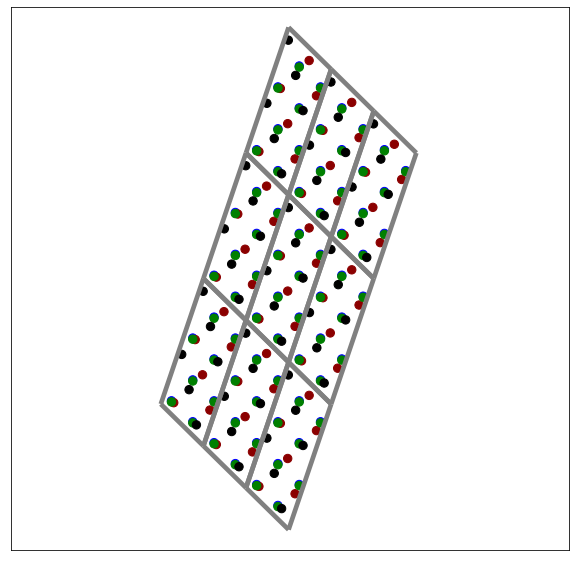

1

In [9]:
(sa,sb)=gcA.vectors()
(sa,sb)=transfVs(sa,sb,(1,1,-1,3))

sM=superMesh(sa,sb,[gcA, gcB.mRot(44.86)])
sM.name="Gese-Beta sobre GeSe-Alpha (rotado 44.86º)"
sM.exporta()
sM.showNM(3,3,t=70)

In [10]:
gcA.name

'GeSe-Alfa'

In [17]:
vec1,vec2=gcA.vectors()
c,d=gcB.vectors()
(p1,p2),(p3,p4)=transfVs(vec1,vec2,(1,1,-1,3)),transfVs(c,d,(0,3,-1,1))
print((p1,p2),(p3,p4))
print(dist(p1,p3),dist(p2,p4))

((4.0130319595, -4.048211984), (4.0130319595, 12.144635952)) ((4.0130319595, -4.048211984), (4.0130319595, 12.144635952))
0.0 0.0


In [12]:
def inv2x2(m):
    a,b,c,d = m
    det = (a*d)-(b*c)
    return (d/det, -b/det, -c/det, a/det)

### Matrices de transformación:

$$
T_{a}=
\left(
    \begin{array}{cc}
        1 & 1 & 0 \\
        -1 & 3 & 0 \\
        0 & 0 & 1
    \end{array}
\right)
\,
T_{b}=
\left(
    \begin{array}{cc}
        0 & 3 & 0 \\
        -1 & 1 & 0 \\
        0 & 0 & 1
    \end{array}
\right)
$$
---

$$
T_{a}=
\left(
    \begin{array}{cc}
        0 & 0 & 1 \\
        1 & 1 & 0 \\
        -1 & 3 & 0
    \end{array}
\right)
\,
T_{b}=
\left(
    \begin{array}{cc}
        0 & 0 & 1 \\
        0 & 3 & 0 \\
        -1 & 1 & 0
    \end{array}
\right)
$$
---

In [13]:
sv1,sv2 = transfVs(vec1,vec2,(1,1,-1,3))
print("SuperVA = {}\nSuperVB = {}".format(sv1,sv2))
print("|SuperVA| = {}\n|SuperVB| = {}".format(dist(sv1,(0,0)),dist(sv2,(0,0))))
print("Ang. interno = {}°".format(cAng(sv1,sv2)))


SuperVA = (4.0130319595, -4.048211984)
SuperVB = (4.0130319595, 12.144635952)
|SuperVA| = 5.700214537661687
|SuperVB| = 12.790488963076406
Ang. interno = 116.96459793635009°


In [14]:
#Cargamos Valores de la Matriz de super vectores
(x,y) = sv1
alfaX, alfaY = sv2
print("x = {:.4f}\ny = {:.4f}".format(x,y))
print("x' = {:.4f}\ny' = {:.4f}".format(alfaX, alfaY))

x = 4.0130
y = -4.0482
x' = 4.0130
y' = 12.1446


In [15]:
#Calculamos el inverso de la matris de Transformación para capa1
t1 = (1,1,-1,3)
t1i = inv2x2(t1)
#Calculamos el inverso de la matris de Transformación para capa
t2 = (0,3,-1,1)
t2i = inv2x2(t2)
# Redefinimos los vectores generadores de ambas capas en sus 2 versiones con los que obtuvimos.
va, vb = transfVs((x,y), (alfaX, alfaY),t1i)
print("Cambiamos capa1:",(va,vb))
gcA.setNewVectors(va, vb) 
va, vb = transfVs((x,y), (alfaX, alfaY),t2i)
print("Cambiamos capa1:",(va,vb))
gcB.setNewVectors(va, vb)
#Actualizando valores
ru,rv=gcB.u,gcB.v
(a1,a2),(b1,b2) = u,v=gcA.u,gcA.v
print("a  = ({:.4f} , {:.4f})\nb  = ({:.4f},{:.4f})".format(a1,a2,b1,b2))
(a1,a2),(b1,b2) = gcB.u,gcB.v
print("a' = ({:.4f} , {:.4f})\nb' = ({:.4f},{:.4f})".format(a1,a2,b1,b2))

Cambiamos capa1: ((4.0130319595, 0.0), (0.0, 4.048211984))
Cambiamos capa1: ((2.6753546396666668, 2.6988079893333334), (-4.0130319595, 4.048211984))
a  = (4.0130 , 0.0000)
b  = (0.0000,4.0482)
a' = (2.6754 , 2.6988)
b' = (-4.0130,4.0482)


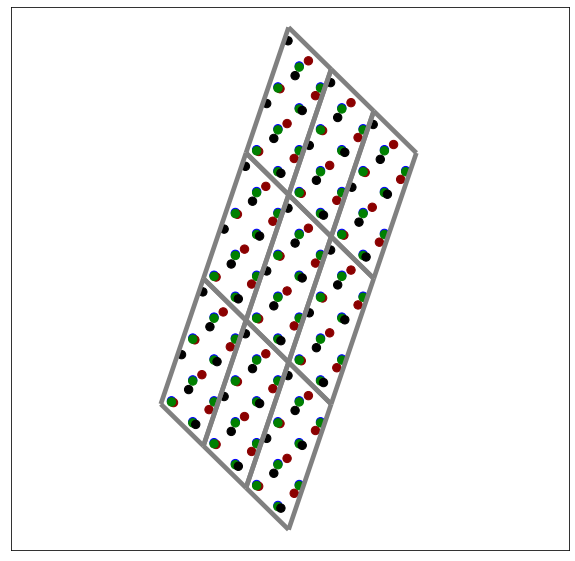

1

In [20]:
(sa,sb)=gcA.vectors()
(sa,sb)=transfVs(sa,sb,(1,1,-1,3))

sM=superMesh(sa,sb,[gcA, gcB])
sM.name="Gese-Beta sobre GeSe-Alpha (rotado 44.86º)Mod"
sM.exporta()
sM.showNM(3,3,t=70)

In [27]:
((a1m,a2m),(b1m,b2m))=gcB.vectors()
print(a1m,b1m,a2m,b2m)

2.6753546396666668 -4.0130319595 2.6988079893333334 4.048211984


In [28]:
((a1o,a2o),(b1o,b2o))=GeSeB().mRot(44.86).vectors()
print(a1o,b1o,a2o,b2o)

2.712063940061041 -4.097463697669707 2.6988425749596425 4.11753677048961


In [32]:
(in1,in2,in3,in4)=inv2x2((a1m,b1m,a2m,b2m))
inv1,inv2=(in1,in3),(in2,in4)

In [33]:
transfVs(inv1,inv2,(a1o,b1o,a2o,b2o))

((1.0068670494964906, -0.004569489565042439),
 (-0.002935947637455305, 1.019082090002982))

In [38]:
def toMat(v1,v2):
    (a,b)=v1
    (c,d)=v2
    return(a,c,b,d)

In [42]:
x1,x2=transfVs(inv1,inv2,(a1o,b1o,a2o,b2o))
toMat(x1,x2)

(1.0068670494964906,
 -0.002935947637455305,
 -0.004569489565042439,
 1.019082090002982)

In [46]:
cAng(x1,(1,0))

0.2600250641771154

In [45]:
cAng((a1o,a2o),(b1o,b2o))

90.0

In [48]:
print(GeSeB())

GeSe-Alfa
1.0
        3.8261001110         0.0000000000         0.0000000000
        0.0000000000         5.8088998795         0.0000000000
        0.0000000000         0.0000000000         18.0892009735
	Ge	Se
	2	2
Direct
     0.7500000000         0.3677821160         0.1605478230
     0.2500000000         0.8684009310         0.0633941810
     0.7500000000         0.8466233610         0.1608372630
     0.2500000000         0.3469434380         0.0630845500


In [50]:
print(gcB)

GeSe-Alfa
1.0
        3.8001430251         -0.0000000000         0.0000000000
        0.0497515940         5.6999974170         0.0000000000
        0.0000000000         0.0000000000         18.0892009735
	Ge	Se
	2	2
Direct
     0.7500000000         0.3677821160         0.1605478230
     0.2500000000         0.8684009310         0.0633941810
     0.7500000000         0.8466233610         0.1608372630
     0.2500000000         0.3469434380         0.0630845500
